<a href="https://colab.research.google.com/github/harvydavies/LCO-code/blob/main/Workingcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

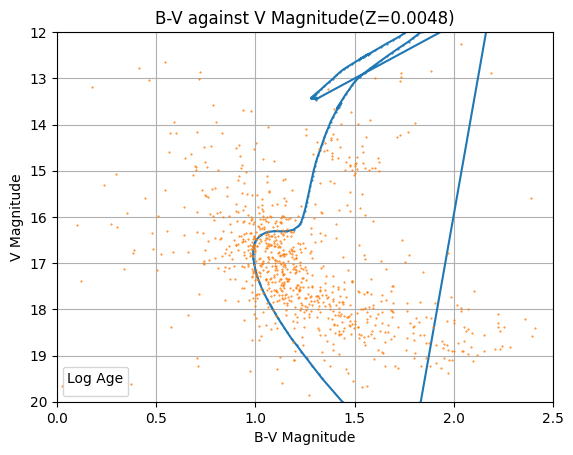

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


data = np.loadtxt('/content/nedisochrone.dat')

# Assuming columns for V magnitude, B magnitude, and log age are at indices 31, 32, and 2 respectively
iv_mag = data[:, 30] + 5*np.log10(3600) -5
ib_mag = data[:, 29] + 5*np.log10(3600) -5
log_age = data[:, 2]

# Calculate B-V magnitude
ib_v_mag = ib_mag - iv_mag


df = pd.read_csv('/content/final_matches27april.csv')
b_magall = df['MAG_ISO_2_B']
v_magall = df['MAG_ISO_1_V']

# Convert lists to numpy arrays
b_magall2 = b_magall #- 5*np.log10(3600) +5
#b_error = np.array(b_error)
v_magall2 = v_magall #- 5*np.log10(3600) +5
#v_error = np.array(v_error)


# Calculate B-V magnitude
b_v_magall = b_magall2 - v_magall2
#b_v_error = np.sqrt(b_error**2 + v_error**2)  # Error propagation

'''
# Load data from the file
data = np.loadtxt('/content/0.0048isochrone.dat')

# Assuming columns for V magnitude, B magnitude, and log age are at indices 31, 32, and 2 respectively
v_mag = data[:, 30] + 5*np.log10(3600) -5
b_mag = data[:, 29] + 5*np.log10(3600) -5
log_age = data[:, 2]

# Calculate B-V magnitude
b_v_mag = b_mag - v_mag

# Filter data points with B-V magnitude higher than 9
filtered_indices = np.where(b_v_mag <= 3)
v_mag = v_mag[filtered_indices]
b_v_mag = b_v_mag[filtered_indices]
log_age = log_age[filtered_indices]
v_mag_1=v_mag+9
# Get unique log ages and assign colors
unique_log_ages = np.unique(log_age)
min_log_age = 9.2
max_log_age = 9.3
log_age_interval = 0.1
log_ages_to_plot = np.arange(min_log_age, max_log_age + log_age_interval, log_age_interval)
num_ages = len(log_ages_to_plot)
colors = plt.cm.viridis(np.linspace(0, 1, num_ages))

# Plot B-V against V magnitude with color-coded points
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
for i, log_age_val in enumerate(log_ages_to_plot):
    mask = np.isclose(log_age, log_age_val, atol=0.1)  # Filter by approximate equality to the log age within a tolerance
    # Make UBV data points translucent
    if np.any(mask):
        plt.scatter(b_v_mag[mask], v_mag_1[mask], label=f'log(age)={log_age_val:.1f}', color=colors[i], alpha=0.9,)

# Read data from LCOBdata file
with open("b_byhand.Dat", "r") as f:
    lines = f.readlines()
    b_magnitude = []
    b_error = []
    for line in lines[3:]:
        elements = line.split()
        if len(elements) >= 5:
            b_magnitude.append(float(elements[3]))
            b_error.append(float(elements[4]))

# Read data from LCOVdata file
with open("v_byhand.Dat", "r") as f:
    lines = f.readlines()
    v_magnitude = []
    v_error = []
    for line in lines[3:]:
        elements = line.split()
        if len(elements) >= 5:
            v_magnitude.append(float(elements[3]))
            v_error.append(float(elements[4]))


# Convert lists to numpy arrays
b_magnitude = np.array(b_magall)
#b_error = np.array(b_error)
v_magnitude = np.array(v_magall)
#v_error = np.array(v_error)

b_magnitude1 = b_magnitude - 5*np.log10(3600) +5
#b_error = np.array(b_error)
v_magnitude1 = v_magnitude - 5*np.log10(3600) +5

# Calculate B-V magnitude
b_v_magnitude = b_magnitude1 - v_magnitude1
#b_v_error = np.sqrt(b_error**2 + v_error**2)  # Error propagation

# Plot B-V against V magnitude with error bars
#plt.errorbar(b_v_magnitude, v_magnitude1, xerr=v_error, yerr=b_v_error, fmt='o', markersize=4, color='blue')
'''

plt.plot(ib_v_mag+0.5, iv_mag, marker = '.', markersize = '1', linestyle = '-')

plt.plot(b_v_magall, v_magall2, marker = '.', markersize = '1', linestyle = '')

# Add legend with labels
plt.legend(title='Log Age', loc='lower left', fontsize='small')

# Add labels indicating log age
#for i, log_age_val in enumerate(log_ages_to_plot):
   # plt.text(plt.xlim()[1] + 0.05, plt.ylim()[1] - i * 0.2, f'log(age)={log_age_val:.1f}', color=colors[i])

plt.xlabel('B-V Magnitude')
plt.ylabel('V Magnitude')
plt.title('B-V against V Magnitude(Z=0.0048)')
plt.ylim(12,20)
plt.xlim(0,2.5)
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()